In [48]:
import os
import random
import shutil

splitsize = .85
categories = []

source_folder = r"C:\Users\siyas\Desktop\projects\sharks"
folders = os.listdir(source_folder)
print(folders)

for subfolder in folders:
    if os.path.isdir(source_folder + "/" + subfolder):
        categories.append(subfolder)

categories.sort()
print(categories)

# create a target folder
target_folder = r"C:\Users\siyas\Desktop\projects\sharks"
existDataSetPath = os.path.exists(target_folder)
if not existDataSetPath:
    os.mkdir(target_folder)

['basking', 'blacktip', 'blue', 'bull', 'dataset_for_model', 'hammerhead', 'lemon', 'mako', 'nurse', 'sand tiger', 'thresher', 'tiger', 'whale', 'white', 'whitetip']
['basking', 'blacktip', 'blue', 'bull', 'dataset_for_model', 'hammerhead', 'lemon', 'mako', 'nurse', 'sand tiger', 'thresher', 'tiger', 'whale', 'white', 'whitetip']


In [49]:
# Path to the original dataset
source_folder = r"C:/Users/siyas/Desktop/projects/sharks"
# Path where split dataset will be stored
target_folder = r"C:/Users/siyas/Desktop/projects/sharks/dataset_for_model"
# Ensure the target_folder exists
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Create base train and validate folders
trainPath = os.path.join(target_folder, "train")
validatePath = os.path.join(target_folder, "validate")

os.makedirs(trainPath, exist_ok=True)
os.makedirs(validatePath, exist_ok=True)

# Train-validation split ratio
splitsize = 0.85

# List of shark categories (subfolder names)
categories = ['basking', 'blacktip', 'blue', 'bull', 'hammerhead', 'lemon',
              'mako', 'nurse', 'sand tiger', 'thresher', 'tiger', 'whale',
              'white', 'whitetip']

# Function to split the data
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []

    for filename in os.listdir(SOURCE):
        file = SOURCE + "/" + filename
        if os.path.getsize(file) > 0 and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            files.append(filename)
        else:
            print(filename + " is 0 length or not an image, ignored...")

    print(f"{len(files)} valid images found in {SOURCE}")

    trainingLength = int(len(files) * SPLIT_SIZE)
    shuffleSet = random.sample(files, len(files))
    trainingSet = shuffleSet[:trainingLength]
    validationSet = shuffleSet[trainingLength:]

    # copy the train images
    for filename in trainingSet:
        thisFile = SOURCE + "/" + filename
        destination = TRAINING + "/" + filename
        shutil.copyfile(thisFile, destination)

    # copy the validation images
    for filename in validationSet:
        thisFile = SOURCE + "/" + filename
        destination = VALIDATION + "/" + filename
        shutil.copyfile(thisFile, destination)

# Create base train and validate folders
trainPath = target_folder + "/train"
validatePath = target_folder + "/validate"

if os.path.exists(trainPath) == False:
    os.mkdir(trainPath)
if os.path.exists(validatePath) == False:
    os.mkdir(validatePath)

# Run the split_data function for each category
for category in categories:
    trainDestPath = trainPath + "/" + category
    validateDestPath = validatePath + "/" + category

    if os.path.exists(trainDestPath) == False:
        os.mkdir(trainDestPath)
    if os.path.exists(validateDestPath) == False:
        os.mkdir(validateDestPath)

    sourcePath = source_folder + "/" + category
    print("Copying from: " + sourcePath + " to: " + trainDestPath + " and " + validateDestPath)

    split_data(sourcePath, trainDestPath, validateDestPath, splitsize)

print("\n✅ Dataset split completed successfully!")


Copying from: C:/Users/siyas/Desktop/projects/sharks/basking to: C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train/basking and C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/validate/basking
93 valid images found in C:/Users/siyas/Desktop/projects/sharks/basking
Copying from: C:/Users/siyas/Desktop/projects/sharks/blacktip to: C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train/blacktip and C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/validate/blacktip
114 valid images found in C:/Users/siyas/Desktop/projects/sharks/blacktip
Copying from: C:/Users/siyas/Desktop/projects/sharks/blue to: C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train/blue and C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/validate/blue
107 valid images found in C:/Users/siyas/Desktop/projects/sharks/blue
Copying from: C:/Users/siyas/Desktop/projects/sharks/bull to: C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train/bull and C:/Users/siyas

In [51]:
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Update your paths to match the correct shark dataset structure
trainPath = r"C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train"
ValidPath = r"C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/validate"

trainGenerator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0, 0.2)
).flow_from_directory(trainPath, target_size=(320, 320), batch_size=32)

ValidGenerator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0, 0.2)
).flow_from_directory(ValidPath, target_size=(320, 320), batch_size=32)

# Build the model using MobileNetV3 Large
baseModel = MobileNetV3Large(weights="imagenet", include_top=False)

x = baseModel.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='hard_swish')(x)
x = Dense(256, activation='hard_swish')(x)
x = Dense(128, activation='hard_swish')(x)

predictionLayer = Dense(trainGenerator.num_classes, activation='softmax')(x)
model = Model(inputs=baseModel.input, outputs=predictionLayer)

print(model.summary())

Found 1541 images belonging to 14 classes.
Found 624 images belonging to 14 classes.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_6 (Rescaling)       │ (None, None, None, 3)     │               0 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv (Conv2D)                 │ (None, None, None, 16)    │             432 │ rescaling_6[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_bn (BatchNormalization)  │ (None, None, None, 16)    │              64 │ conv[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_120 (Activation)   │ (None, None, None, 16)    │               0 │ conv_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, None, None, 16)    │             144 │ activation_120[0][0]       │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_bn    │ (None, None, None, 16)    │              64 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_114 (ReLU)              │ (None, None, None, 16)    │               0 │ expanded_conv_depthwise_b… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, None, None, 16)    │             256 │ re_lu_114[0][0]            │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_bn      │ (None, None, None, 16)    │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_add (Add)       │ (None, None, None, 16)    │               0 │ activation_120[0][0],      │
│                               │                           │                 │ expanded_conv_project_bn[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_1_expand        │ (None, None, None, 64)    │           1,024 │ expanded_conv_add[0][0]    │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_1_expand_bn     │ (None, None, None, 64)    │             256 │ expanded_conv_1_expand[0]… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_115 (ReLU)              │ (None, None, None, 64)    │               

 Total params: 3,654,414 (13.94 MB)

 Trainable params: 3,630,014 (13.85 MB)

 Non-trainable params: 24,400 (95.31 KB)

None


In [52]:
from PIL import Image
import os

def convert_images_to_rgb(folder):
    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        if img.mode in ("P", "RGBA"):
                            img = img.convert("RGB")
                            img.save(file_path)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Run it on both train and validation folders
convert_images_to_rgb(r"C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train")
convert_images_to_rgb(r"C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/validate")


C:\Users\siyas\anaconda3\padhai\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [44]:
# Freeze the layers of the MobileNetV3 (already trained)
for layer in model.layers[:-5]:
    layer.trainable = False

# Compile
optimizer = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(trainGenerator, validation_data=ValidGenerator, epochs=30)

# Now you can print the final accuracies
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 335s 7s/step - accuracy: 0.1421 - loss: 2.5710 - val_accuracy: 0.3251 - val_loss: 2.3116
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.3440 - loss: 2.1997 - val_accuracy: 0.3901 - val_loss: 1.9621
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4242 - loss: 1.8617 - val_accuracy: 0.4507 - val_loss: 1.7193
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.4860 - loss: 1.6644 - val_accuracy: 0.5135 - val_loss: 1.5092
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5721 - loss: 1.4131 - val_accuracy: 0.5785 - val_loss: 1.4414
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5803 - loss: 1.3475 - val_accuracy: 0.6233 - val_loss: 1.2768
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.5637 - loss: 1.3674 - val_accuracy: 0.6143 - val_loss: 1.2313
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6220 - loss: 1.2137 - val_accuracy: 0.6054 - val_lo

In [30]:
model.save("SharkV3.keras")
# then load it using
model = tf.keras.models.load_model("SharkV3.keras")

In [53]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
import os

# Get the list of categories
categories = os.listdir(r"C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/train")
categories.sort()
print(categories)

# Load the saved model
modelSavedPath = "C:/Users/siyas/Desktop/projects/sharks/dataset_for_model/SharkV3.keras"
model = tf.keras.models.load_model(modelSavedPath)

# Predict the image
def classify_image(imageFile):
    x = []

    img = Image.open(imageFile)
    img.load()
    img = img.resize((320, 320), Image.Resampling.LANCZOS)


    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    print(x.shape)
    pred = model.predict(x)
    print(pred)
    
    # get the highest prediction value
    categoryValue = np.argmax(pred, axis=1)
    categoryValue = categoryValue[0]

    print(categoryValue)

    result = categories[categoryValue]
    return result

['basking', 'blacktip', 'blue', 'bull', 'hammerhead', 'lemon', 'mako', 'nurse', 'sand tiger', 'thresher', 'tiger', 'whale', 'white', 'whitetip']


(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[4.6159996e-04 2.6987188e-02 2.4818453e-01 1.4490637e-01 4.3080002e-04
  3.4697276e-01 1.5379549e-02 7.3794625e-03 6.5103061e-02 2.0340115e-03
  1.1844884e-01 3.1185275e-05 2.1787672e-03 2.1501837e-02]]
5
lemon


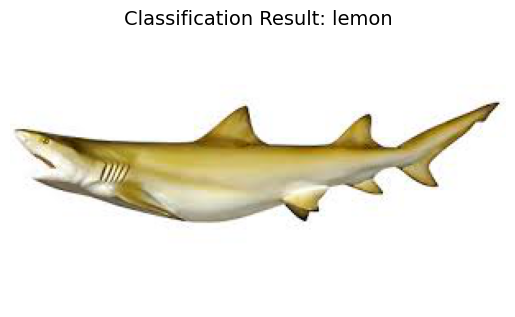

In [56]:
img_path = r"C:\Users\siyas\Downloads\lemon.jpeg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()


(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[2.2426875e-04 4.2677498e-01 2.8977647e-02 7.1500547e-02 2.0831561e-01
  5.4541506e-02 2.5814679e-03 1.3074566e-02 1.1197213e-02 3.5926186e-02
  5.2556782e-03 2.9130899e-05 4.2230138e-04 1.4117897e-01]]
1
blacktip


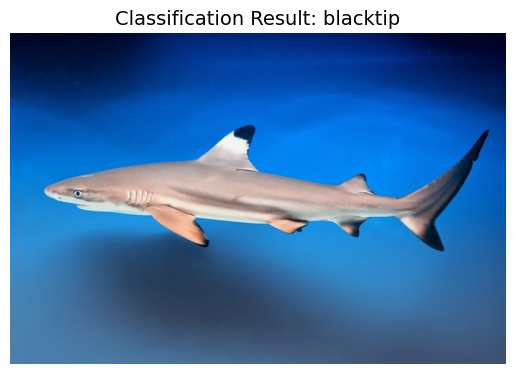

In [9]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\blacktip\00000146.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
[[2.3283639e-03 4.2591792e-02 6.3566647e-02 3.5444953e-02 1.7600681e-01
  7.6111238e-03 2.2018915e-01 7.3617301e-04 1.6037862e-01 1.5974598e-01
  3.3312980e-03 1.3080158e-05 1.7870514e-02 1.1018542e-01]]
6
mako


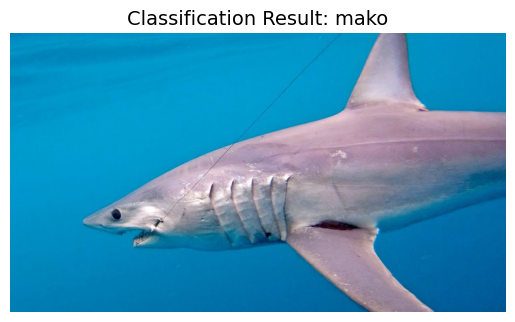

In [3]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\mako\00000061.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[2.3735425e-04 9.7760512e-04 1.0647303e-03 3.7183356e-03 2.4457966e-04
  2.3444865e-02 3.4355697e-05 4.5827702e-03 6.8448119e-02 1.9789040e-05
  8.9357674e-01 7.3682233e-05 6.3027168e-05 3.5139790e-03]]
10
tiger


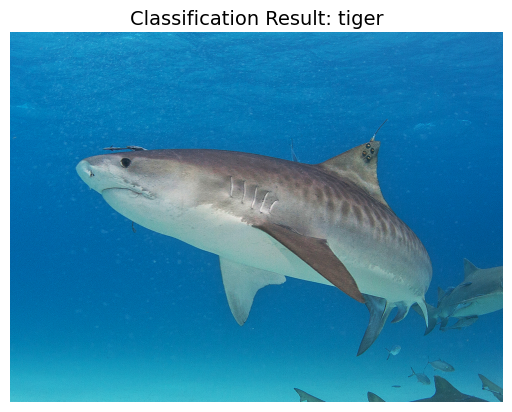

In [54]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\tiger\00000030.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[5.6522702e-05 2.0074826e-02 5.2505410e-03 2.1592457e-02 7.3648256e-01
  2.6057629e-02 1.1051905e-04 1.8135835e-03 2.3731349e-02 1.0879195e-01
  3.7837750e-03 1.0442894e-05 1.2545485e-05 5.2231215e-02]]
4
hammerhead


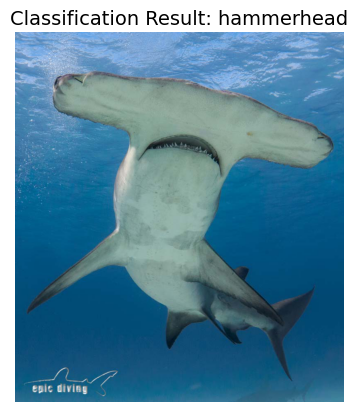

In [5]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\hammerhead\00000043.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
[[9.3704349e-01 1.5033952e-04 2.9528446e-03 3.8901644e-04 1.7887037e-04
  1.8633467e-03 3.8246869e-03 9.6296176e-04 3.0251529e-02 6.3001504e-04
  8.5830141e-04 9.1466708e-03 8.1033232e-03 3.6446115e-03]]
0
basking


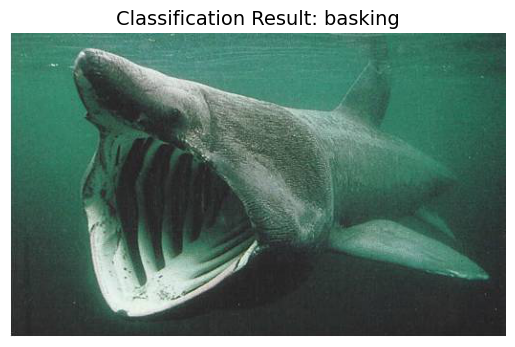

In [10]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\basking\00000028.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[1.1358035e-03 2.1772389e-03 6.1897290e-01 1.2468091e-02 2.0492852e-03
  4.3096732e-02 4.6511372e-03 1.0050702e-02 1.2479407e-02 2.1030442e-01
  3.2599974e-02 4.2663224e-04 8.4843123e-03 4.1103374e-02]]
2
blue


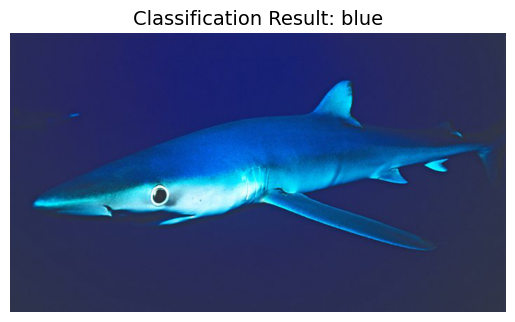

In [58]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\blue\00000020.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[1.0875415e-04 4.2433579e-02 5.9923846e-03 4.0398657e-01 3.2496452e-02
  1.7957413e-01 8.8710210e-04 3.0562360e-02 2.1412680e-01 1.3301520e-03
  7.9608038e-02 5.5212247e-05 9.9336372e-05 8.7392842e-03]]
3
bull


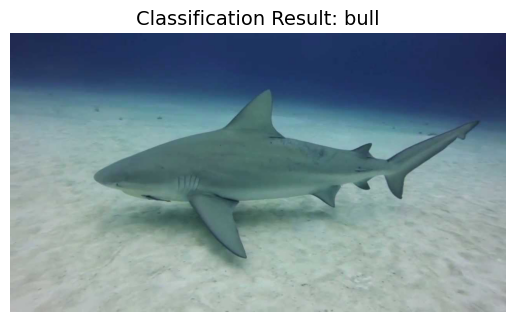

In [13]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\bull\00000065.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[[6.0490839e-04 3.4037961e-03 8.8306871e-04 1.6390668e-02 5.7194861e-06
  8.6292803e-02 1.5038153e-04 3.6527178e-01 1.5775473e-01 9.0167068e-06
  3.0818805e-01 1.0606784e-02 1.4418252e-03 4.8996463e-02]]
7
nurse


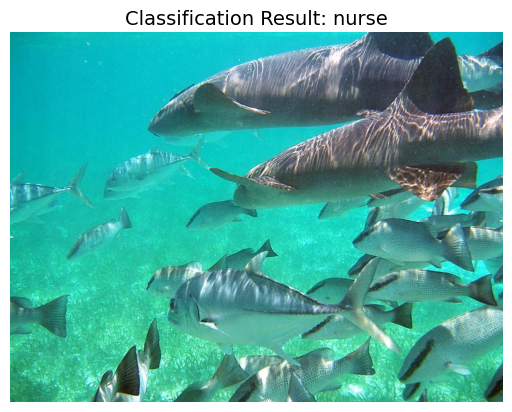

In [14]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\nurse\00000034.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
[[3.2620196e-04 2.6592434e-06 6.6636982e-05 5.7360910e-05 7.1684599e-07
  4.4694074e-04 4.7733614e-05 3.3790825e-04 9.9517858e-01 3.4774965e-07
  3.0192679e-03 2.5827889e-04 6.8383424e-06 2.5044635e-04]]
8
sand tiger


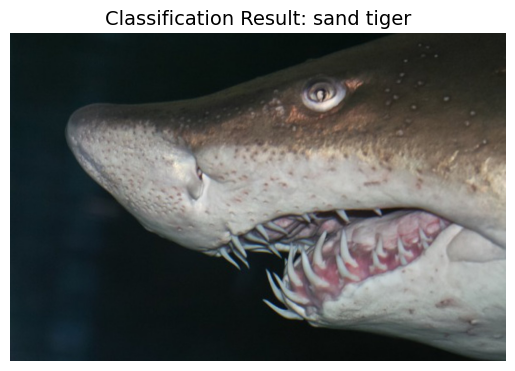

In [15]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\sand tiger\00000063.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[5.9647323e-07 6.5044806e-05 9.2366419e-05 1.3765016e-05 2.5100685e-03
  3.9842494e-06 4.7146841e-06 1.0197276e-05 7.0353309e-08 9.9614513e-01
  1.4340098e-06 4.5047081e-08 1.8475370e-06 1.1507783e-03]]
9
thresher


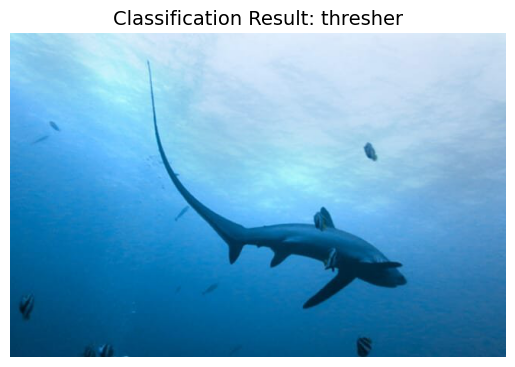

In [17]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\thresher\00000082.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[[1.9410586e-03 1.6162072e-05 8.5135449e-05 1.4281578e-04 5.2862811e-07
  5.8412383e-04 4.5101064e-05 3.0661512e-03 2.7204168e-03 6.5465474e-06
  6.8582833e-04 9.9012357e-01 5.6881347e-04 1.3727447e-05]]
11
whale


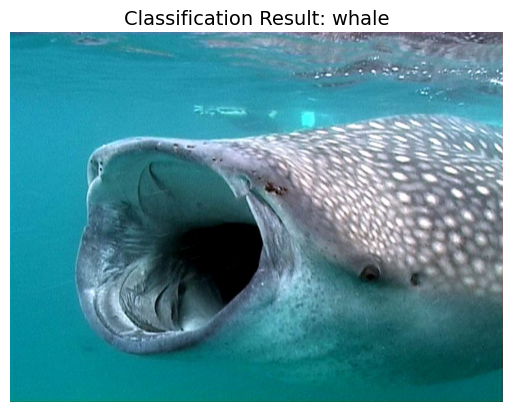

In [18]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\whale\00000030.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
[[3.4237858e-03 5.3523597e-04 4.3906467e-03 5.7573128e-03 7.3007854e-05
  1.8452773e-03 1.8489070e-02 1.9774311e-04 1.6351376e-03 2.4344819e-02
  3.2085783e-04 1.3679379e-04 9.3839568e-01 4.5464674e-04]]
12
white


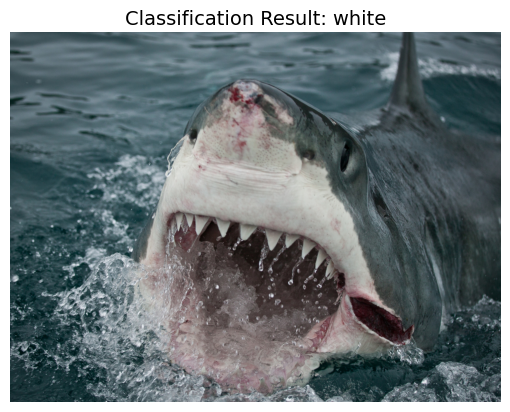

In [19]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\white\00000043.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
[[1.8430999e-03 7.1996488e-02 1.5631231e-02 1.3256902e-02 2.1116176e-01
  1.7388223e-02 8.7123102e-04 6.6056130e-03 1.9940592e-02 8.8591062e-02
  6.1518193e-04 7.4746844e-05 1.2070999e-03 5.5081671e-01]]
13
whitetip


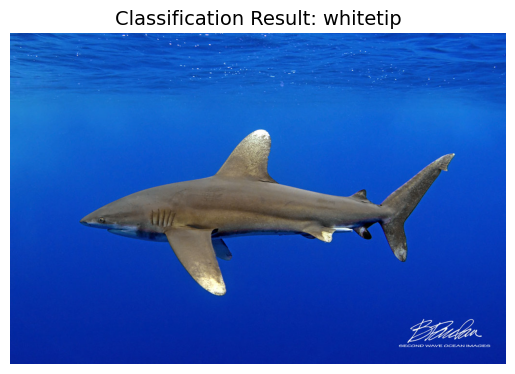

In [21]:
img_path = r"C:\Users\siyas\Desktop\projects\sharks\whitetip\00000074.jpg"
resultText = classify_image(img_path)  
print(resultText)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Classification Result: {resultText}", fontsize=14)
plt.axis('off')  # Hide axis
plt.show()

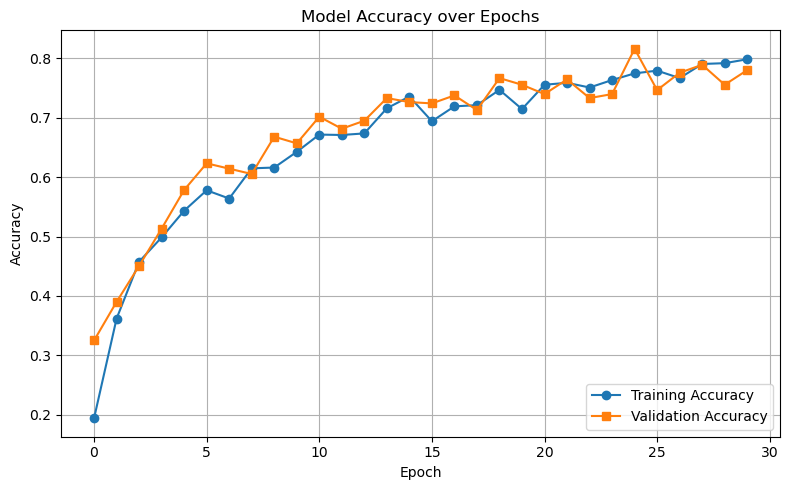

Final Training Accuracy: 0.7985469102859497
Final Validation Accuracy: 0.7802690863609314


In [46]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])